<a href="https://colab.research.google.com/github/Minhajul99/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Using Machine Learning

## Introduction
Diabetes is a growing chronic disease worldwide, with millions of people at risk of the potentially deadly complications of their growing heart disease as well as kidney failure and blindness when therapy is ignored. Early detection of medical conditions not only helps to reduce risks but also helps the patient in recovering from the illness sooner. In this project, we build a machine learning model that will take the medical data of people and tell how much risk of diabetes they have.


## Problem Statement
The existing methods for detecting diabetes depend mainly on clinical testing that shows high costs and requires time and presents access barriers for numerous people. The utilization of historical medical data for machine learning model training creates an effective system that predicts diabetes risk both accurately and cost-efficiently on a large scale.


## Objectives
**The primary objectives of this project are:**
* The development of a machine learning model should utilize key medical features including glucose level, BMI, and age to predict diabetes outcomes.
* Evaluate the performance of different ML algorithms and identify the most accurate model.


## Data Collection
The project will utilize the[ PIMA Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) from the UCI Machine Learning Repository, which contains 768 records of female patients along with their medical attributes.


## About the Dataset
* Pregnancies :- Number of times a woman has been pregnant
* Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose   
  tolerance test
* BloodPressure :- Diastollic Blood Pressure (mm hg)
* SkinThickness :- Triceps skin fold thickness(mm)
* Insulin :- 2 hour serum insulin(mu U/ml)
* BMI :- Body Mass Index ((weight in kg/height in m)^2)
* Age :- Age(years)
* DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# we want our plots to appear inside the notebook
%matplotlib inline


In [2]:
# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/diabetes.csv')
df.shape

(768, 9)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset we're working with.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Are there any missing values?
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There is no missing value.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Here we can see some unusal value in the minimum column. Blood Presure or Glucose never be Zero. So we can assume them as missing values. Here are the columns we assume as missing values:
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

We will try to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.

In [4]:
df_filtered = df.copy()
df_filtered[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_filtered[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
df_filtered.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


We will use Normal distribution and meassure the skewness to fill the NaN values.

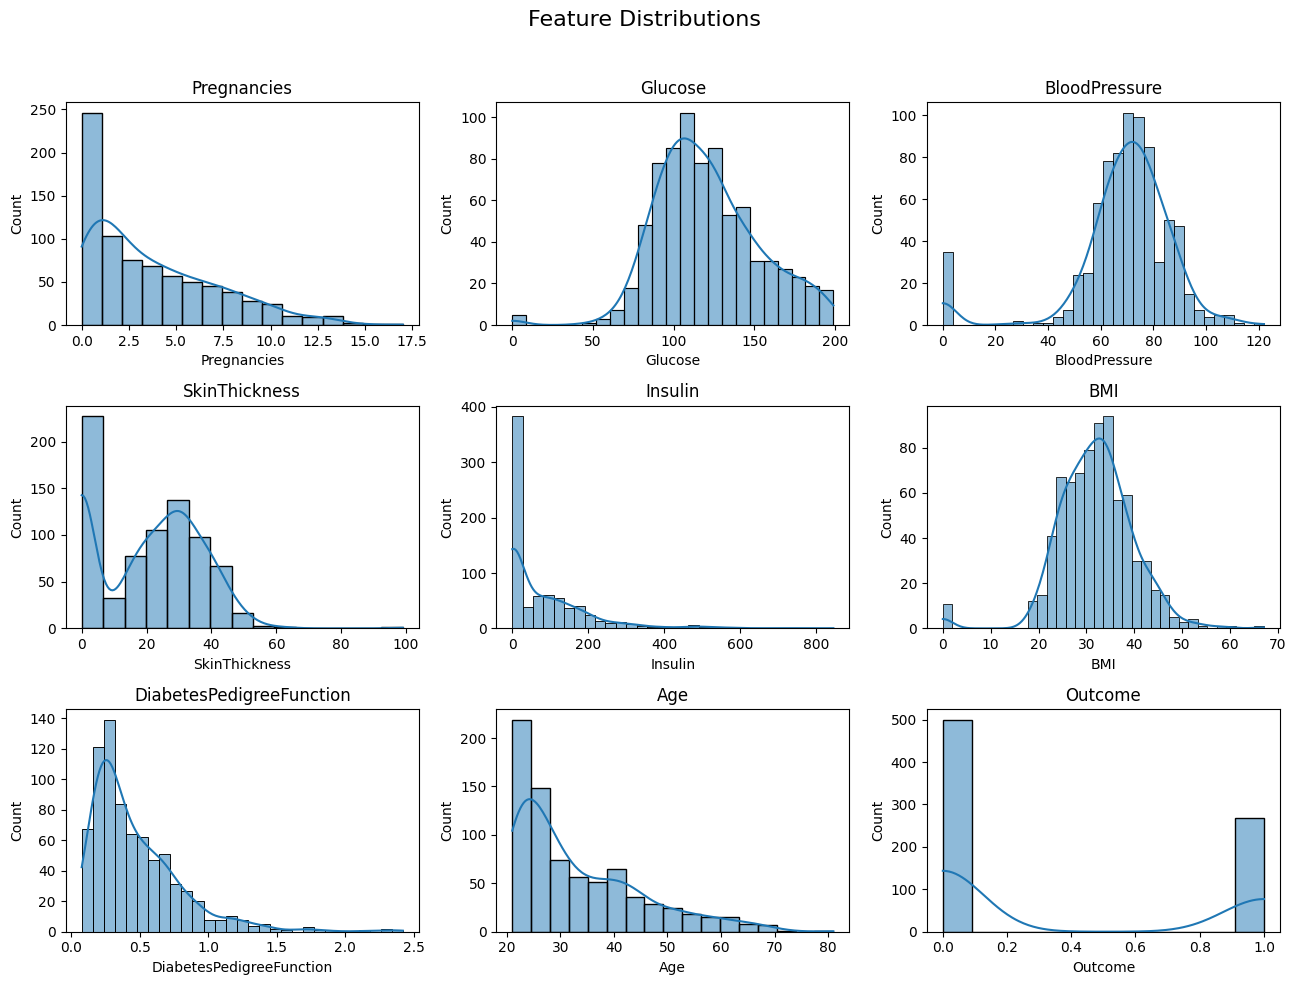

In [5]:
# Plot histograms with KDE to visualize distribution
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
fig.suptitle("Feature Distributions", fontsize=16)

columns = df.columns
for i, ax in enumerate(ax.flat):
    if i < len(columns):
        sns.histplot(df[columns[i]], kde=True, ax=ax)
        ax.set_title(f"{columns[i]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The Imputation of NaN values is made according to their distribution.

In [6]:
df_filtered.fillna({'Glucose': df_filtered['Glucose'].mean()}, inplace=True)
df_filtered.fillna({'BloodPressure': df_filtered['BloodPressure'].mean()}, inplace=True)
df_filtered.fillna({'SkinThickness': df_filtered['SkinThickness'].median()}, inplace=True)
#df_filtered.fillna({'Insulin': df_filtered['Insulin'].median()}, inplace=True)
df_filtered.fillna({'BMI': df_filtered['BMI'].mean()}, inplace=True)

In [7]:
## to find the median for filling null values

def find_median(var):
    temp = df_filtered[df_filtered[var].notnull()]
    temp = df_filtered[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [8]:
find_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [9]:
## Now we will be filling these values instead of null values
df_filtered.loc[(df_filtered['Outcome'] == 0) & (df_filtered['Insulin'].isnull()), 'Insulin'] = 102.5
df_filtered.loc[(df_filtered['Outcome'] == 1) & (df_filtered['Insulin'].isnull()), 'Insulin'] = 169.5

### Distrition Plot after NaN removal

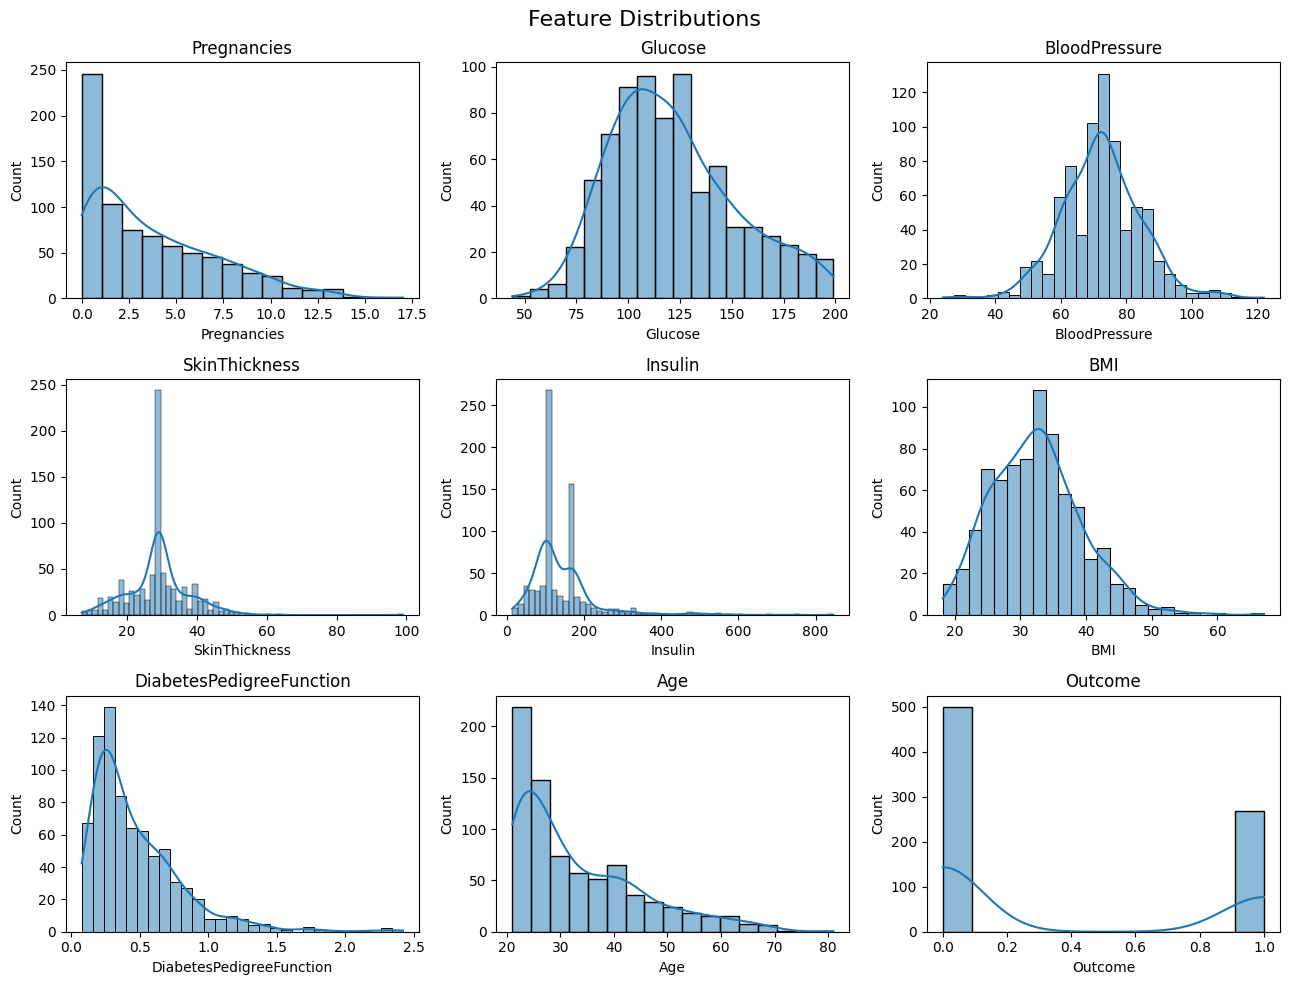

In [ ]:
# Plot histograms with KDE to visualize distribution
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
fig.suptitle("Feature Distributions", fontsize=16)

columns = df_filtered.columns
for i, ax in enumerate(ax.flat):
    if i < len(columns):
        sns.histplot(df_filtered[columns[i]], kde=True, ax=ax)
        ax.set_title(f"{columns[i]}")

plt.tight_layout()
plt.show()

In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Get value counts and convert it into a DataFrame
value_counts = df_filtered["Outcome"].value_counts().reset_index()
value_counts.columns = ["Outcome", "Count"]  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    value_counts,
    x="Outcome",
    y="Count",
    title="Outcome Distribution",
    text="Count",  # Correctly place text on bars
    color=value_counts["Outcome"].astype(str),  # Convert to string for color categories
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update the layout (size & labels)
fig.update_layout(
    width=700,
    height=600,
    xaxis_title="Outcome",
    yaxis_title="Count",
    template="plotly_dark"
)

# Show correct count values on bars
fig.update_traces(textposition='outside')

# Display the chart
fig.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

### Boxplots to find out outliers

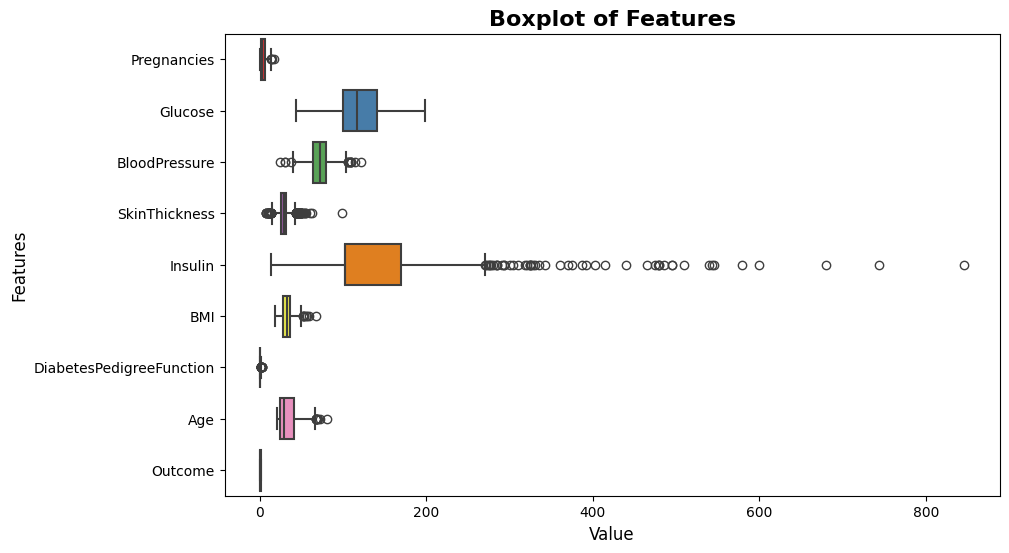

In [ ]:
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(
    data=df_filtered,
    orient="h",
    palette="Set1",
    showfliers=True,
    linewidth=1.5
)

# Add title with better styling
plt.title("Boxplot of Features", fontsize=16, fontweight='bold')

# Improve readability of axis labels
plt.xlabel("Value", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Display the plot
plt.show()


From this boxplot, the "Insulin" feature seems to have the most outliers.

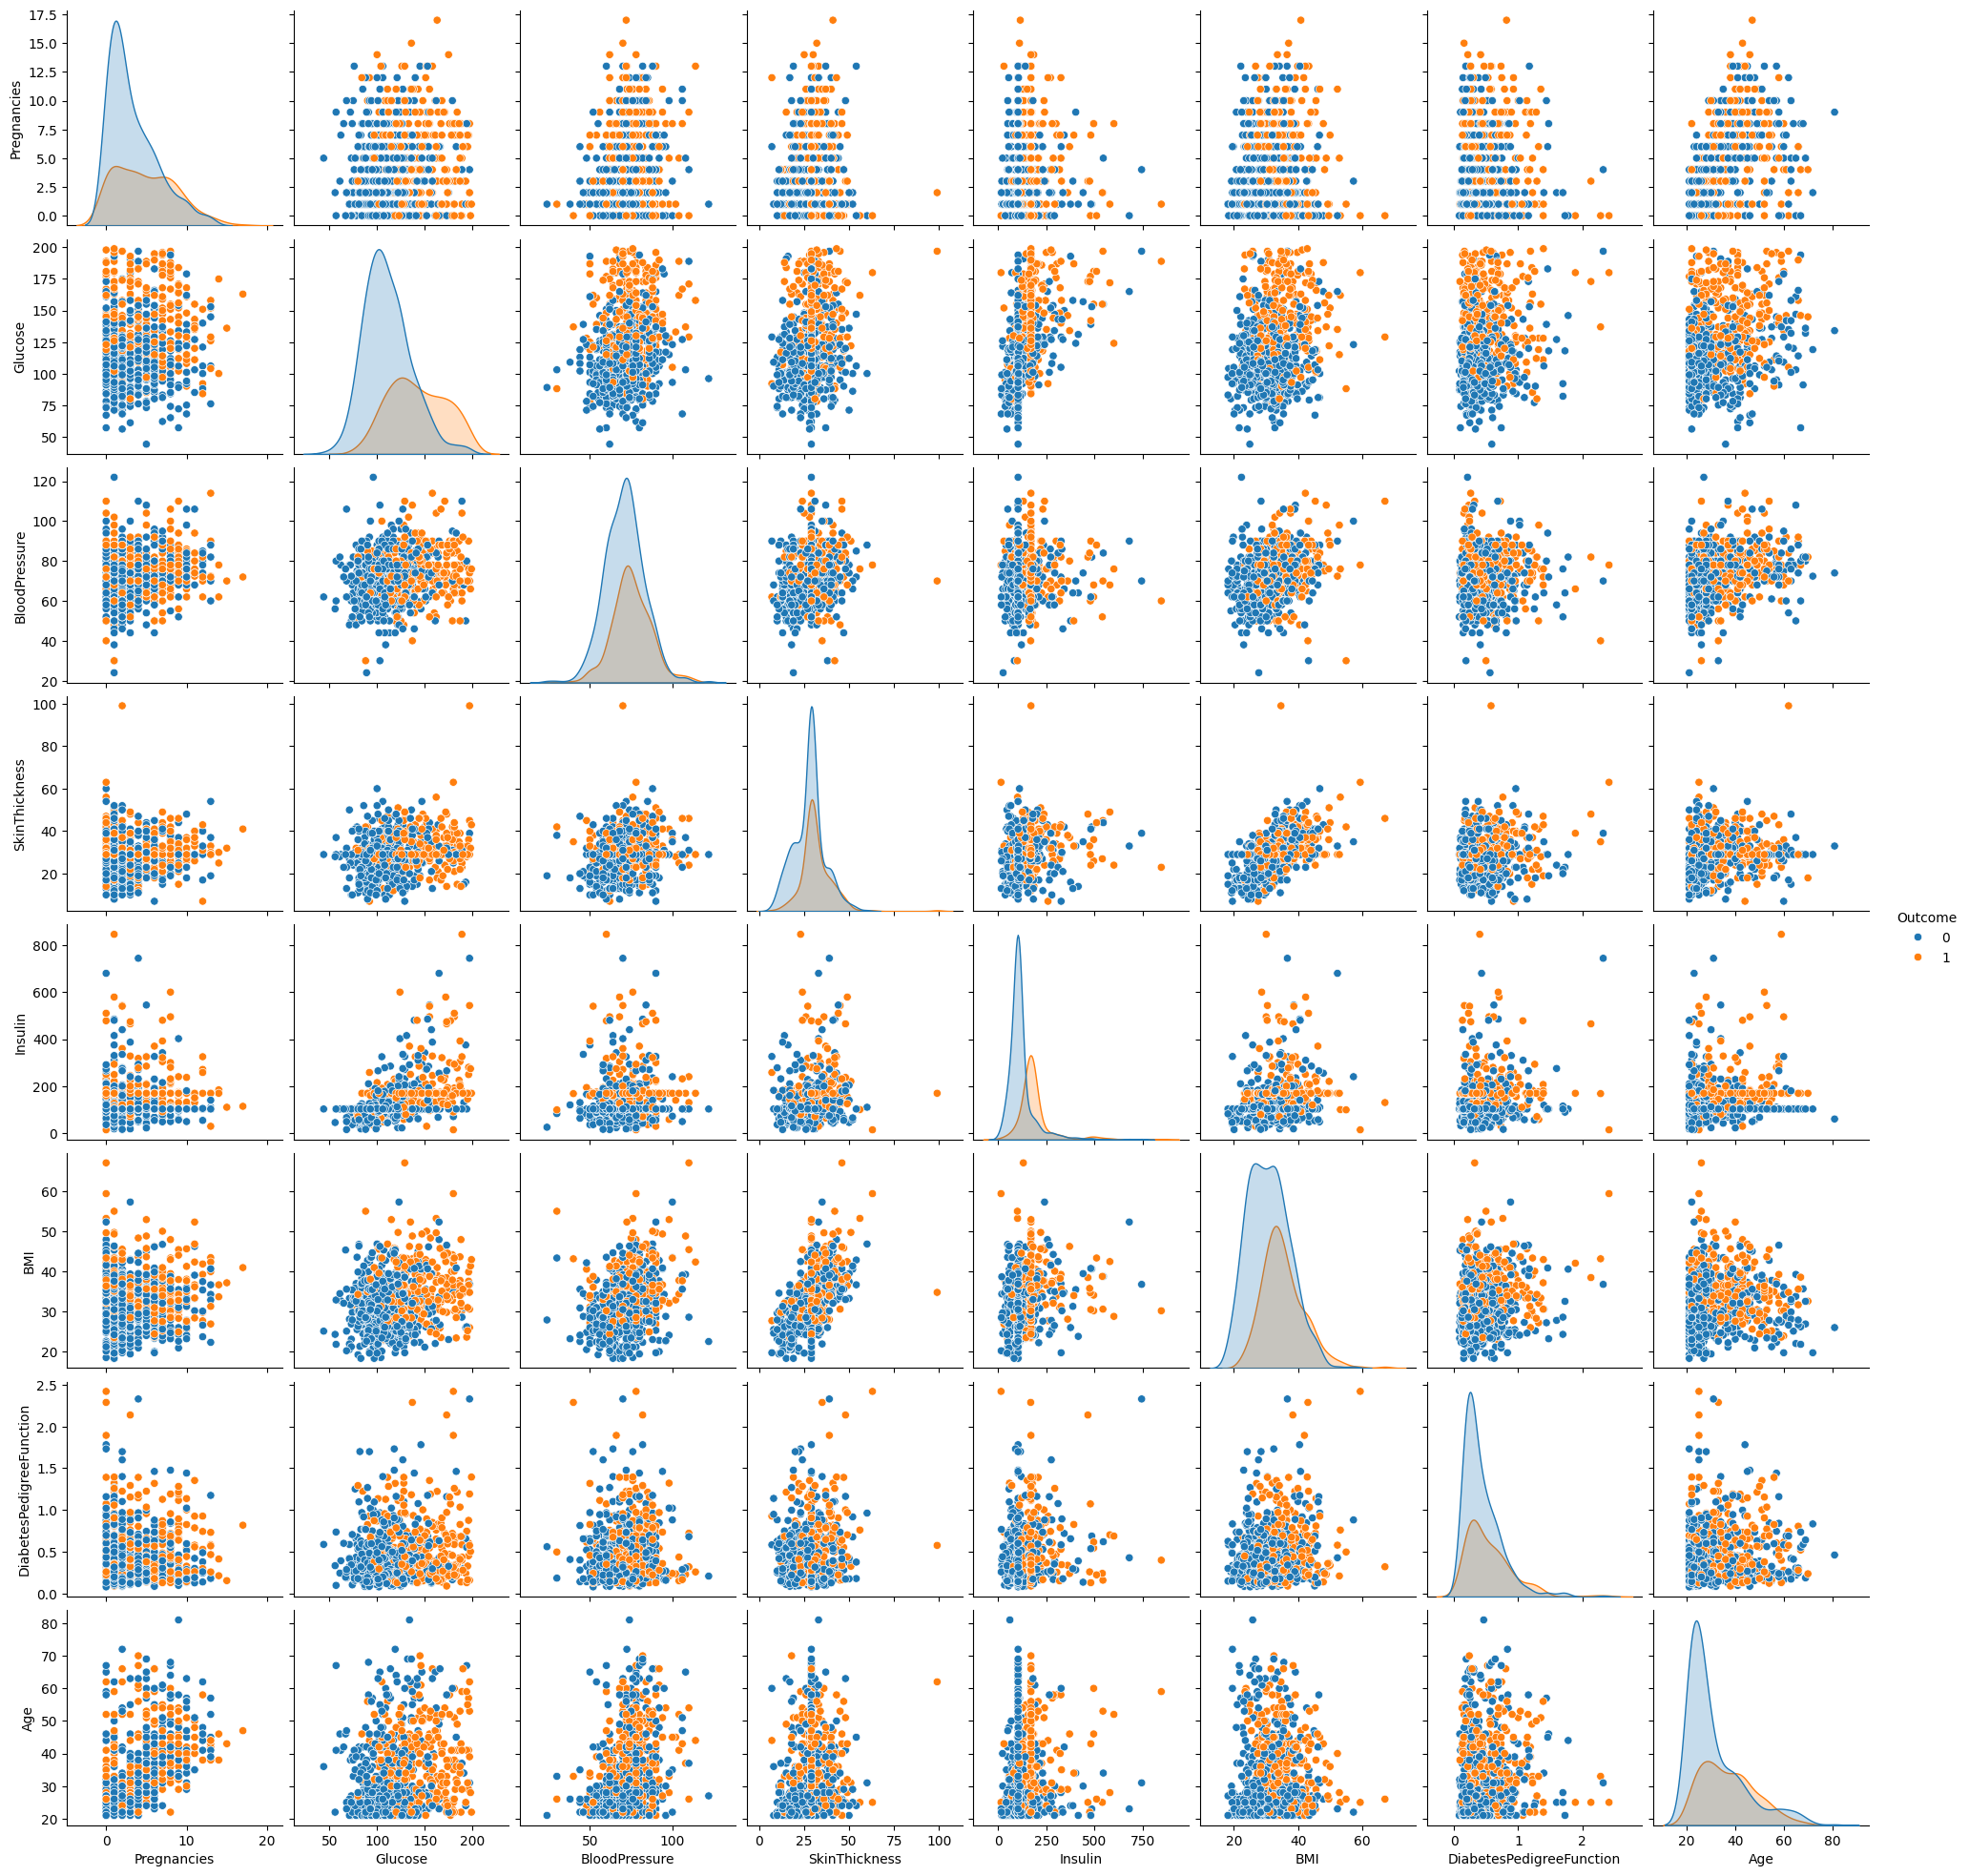

In [ ]:
# Pairplot of the cleaned data.
sns.pairplot(df_filtered, hue='Outcome', diag_kind='kde')
plt.show()


### Heatmap for unclean data

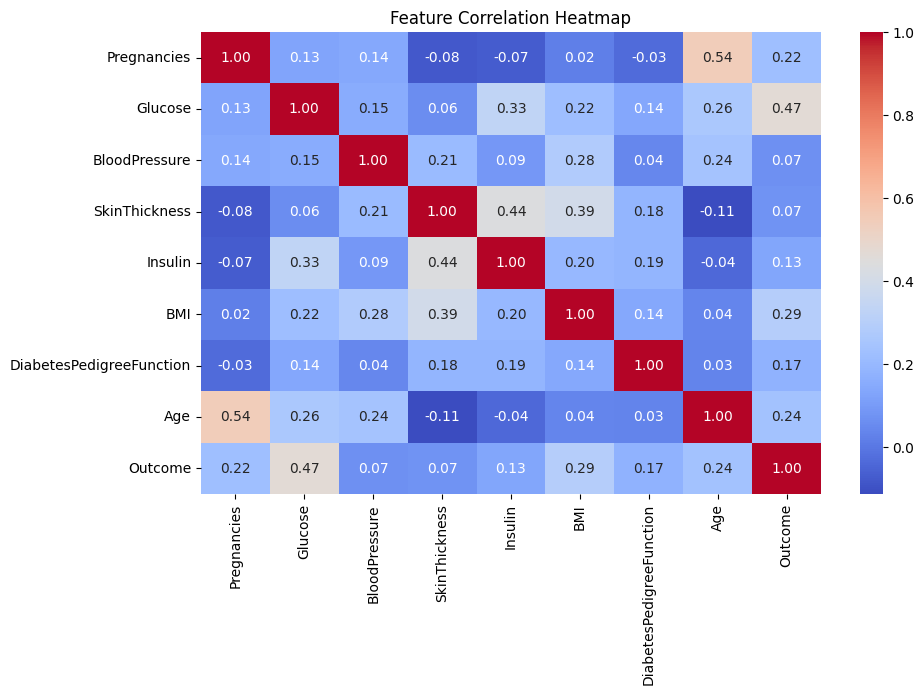

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Heatmap for clean data

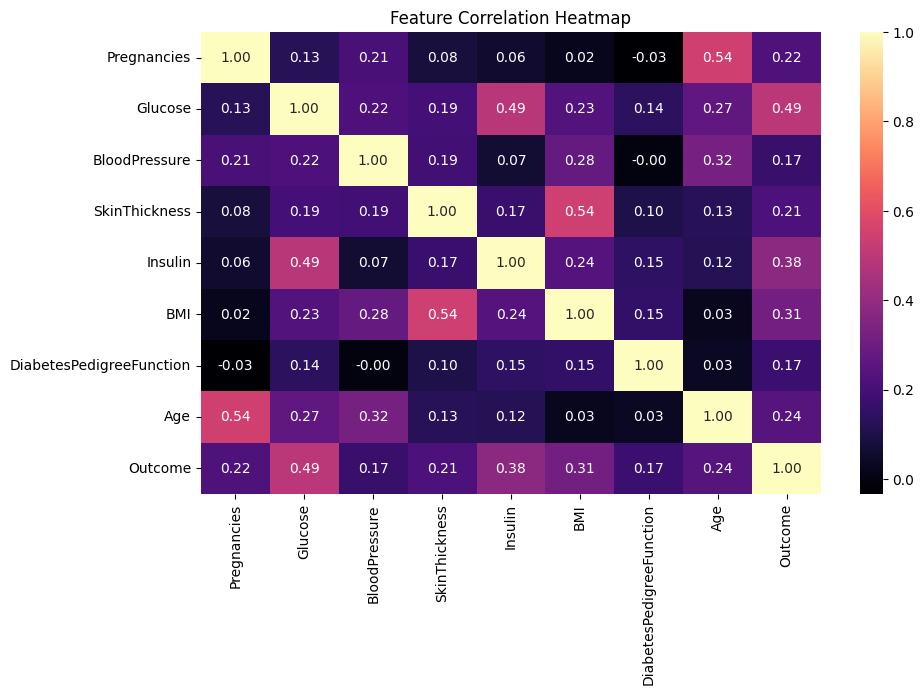

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Splitting the dataset into the Training set and Test set.

In [10]:
# Split data into X and y
X = df_filtered.drop("Outcome", axis=1)
y = df_filtered["Outcome"]

In [11]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Feature Scaling

Here the data Z is standardized as μ = 0 and 𝛔 = 1, and does through this formula: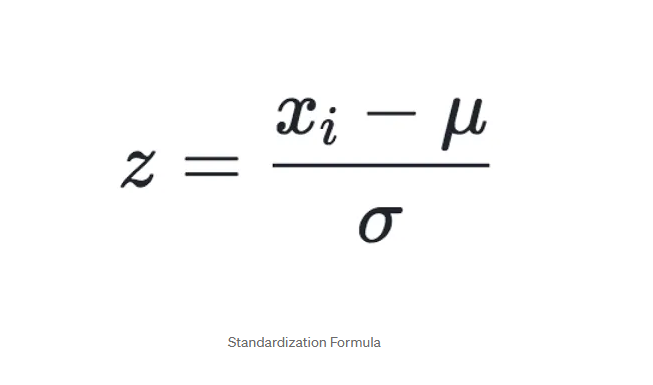

In [12]:
# This copy is for prediction. It has no relation  with Scaling
X_test_original = X_test

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Convert to DataFrame
X_test = pd.DataFrame(X_test, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.792818,-1.178347,0.510202,0.530868,0.237605,-0.116372,0.878091
1,-0.526397,-0.327354,0.227846,0.391226,-0.433914,0.482920,-0.954231,-1.035940
2,-0.526397,-0.460344,-0.682043,0.034298,-0.433914,-0.224163,-0.924520,-1.035940
3,1.285983,-0.493591,0.641433,0.034298,-0.433914,-1.118840,1.149329,0.095078
4,0.983919,0.470585,1.468605,0.034298,-0.433914,-0.354036,-0.770021,1.487101


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy*100:.2f} %")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)


Accuracy: 76.62 %
Confusion Matrix:
 [[82 17]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



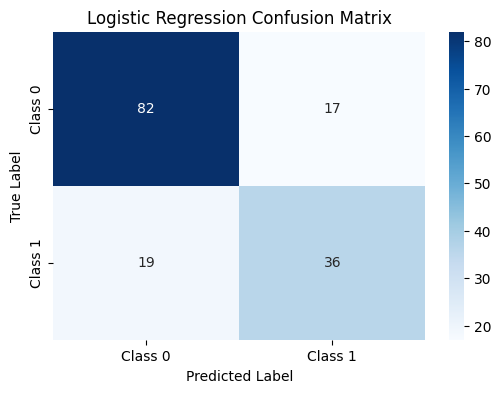

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model_rf = RandomForestClassifier(n_estimators=20)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [18]:
y_pred_rf = model_rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [19]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf *100:.2f} %")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report_rf)


Accuracy: 87.01 %
Confusion Matrix:
 [[89 10]
 [10 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.82      0.82      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



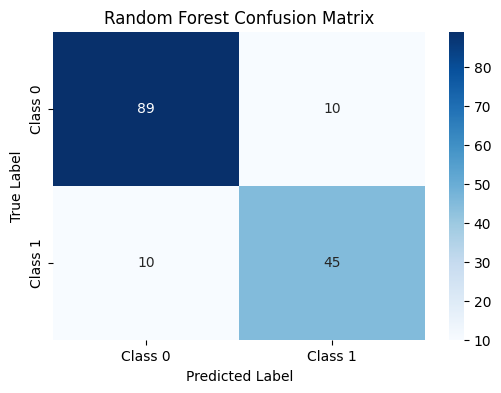

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
np.random.seed(42)
model_svm = SVC(kernel='rbf', C=0.1)
model_svm.fit(X_train, y_train)

SVC(C=0.1)

In [ ]:
y_pred_svm = model_svm.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm *100:.2f} %")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report_svm)


Accuracy: 79.22 %
Confusion Matrix:
 [[92  7]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154



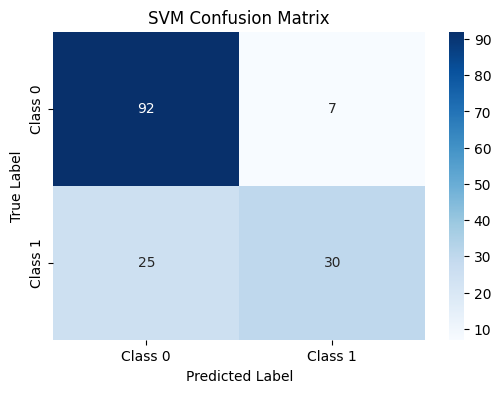

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
model_gr = GradientBoostingClassifier()
model_gr.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gr = model_gr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Accuracy
accuracy_gr = accuracy_score(y_test, y_pred_gr)
print(f"Accuracy: {accuracy_gr *100:.2f} %")

# Confusion Matrix
conf_matrix_gr = confusion_matrix(y_test, y_pred_gr)
print("Confusion Matrix:\n", conf_matrix_gr)

# Classification Report
class_report_gr = classification_report(y_test, y_pred_gr)
print("Classification Report:\n", class_report_gr)


Accuracy: 85.71 %
Confusion Matrix:
 [[86 13]
 [ 9 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



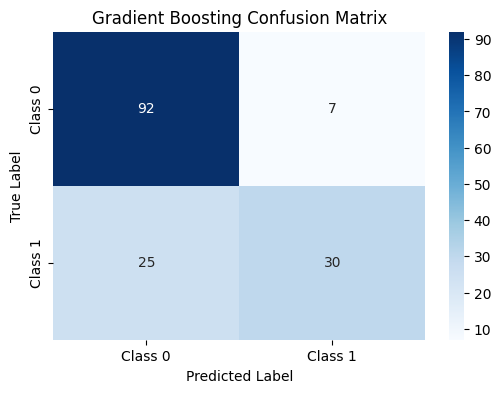

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

## ANN

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Input

np.random.seed(42)

# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=12, activation='relu', input_dim=8))

# Add the second hidden layer
model.add(Dense(units=6, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4436 - loss: 0.7165
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5314 - loss: 0.6950
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6016 - loss: 0.6794
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6815 - loss: 0.6653
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6978 - loss: 0.6551
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7277 - loss: 0.6417
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7375 - loss: 0.6226
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7514 - loss: 0.6075
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7173 - loss: 0.5965
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7548 - loss: 0.5745
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7575 - loss: 0.5653
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - a

In [21]:
y_pred_ann = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [22]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_ann = (y_pred_ann > 0.5).astype(int)

In [23]:

# Accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy_ann *100:.2f} %")

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix:\n", conf_matrix_ann)

# Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)
print("Classification Report:\n", class_report_ann)


Accuracy: 85.71 %
Confusion Matrix:
 [[87 12]
 [10 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.79      0.82      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



## Comparison of Model scores.

In [ ]:
# Compute accuracy scores
model_scores = {
    "ANN": accuracy_score(y_test, y_pred_ann),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gr),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
}

# Convert to DataFrame and display
df_scores = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy Score"])
df_scores["Accuracy Score"] = df_scores["Accuracy Score"] * 100  # Convert to percentage

# Create an interactive bar chart using Plotly
fig = px.bar(df_scores, x="Model", y="Accuracy Score",
             text=df_scores["Accuracy Score"].map(lambda x: f"{x:.2f}%"),  # Format as percentage
             title="Comparison of Model Accuracy Scores",
             labels={"Accuracy Score": "Accuracy (%)"},
             color="Model")

# Show the plot
fig.show()

## Hyperparameter tuning with RandomizedSearchCV

### Logistic Regression

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty":["l2"],
                "solver" : ['lbfgs','newton-cg','liblinear','sag','saga'],
                "max_iter" : [100, 1000,2500, 5000]}



In [ ]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 1.623776739188721}

In [ ]:
rs_log_reg.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



0.7662337662337663

### Random Forest

In [ ]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,30),
         "max_depth": [None, 3, 20, 1],  # 3,5,10
         "min_samples_split": np.arange(2, 20, 1), # 2,20,2
         "min_samples_leaf": np.arange(1, 20, 1)  # 2,20,2
}

In [28]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier().
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 2],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   verbose=True)

In [26]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 11,
 'min_samples_leaf': 5,
 'max_depth': None}

In [27]:
rs_rf.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8766233766233766

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation to evaluate the model
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')  # or use 'f1', 'roc_auc', etc.
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}, Standard Deviation: {scores.std()}")


Cross-validation scores: [0.84552846 0.91869919 0.82113821 0.87804878 0.92622951]
Mean accuracy: 0.8779288284686124, Standard Deviation: 0.040669769009255126


### SVM

In [ ]:
svm_grid = {
    'C': np.logspace(-3, 3, 20),  # logspace for C (similar to loguniform in scipy) 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, num=20)),  # logspace for gamma
    'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel
    'coef0': np.random.uniform(0, 1, 100),  # Uniform distribution for coef0
    'class_weight': [None, 'balanced'],  # Class weight options for imbalanced datasets
}

In [ ]:
# Set up RandomizedSearchCV
rs_svm = RandomizedSearchCV(SVC(),
                            param_distributions=svm_grid,
                            n_iter=100,
                            cv=5,
                            verbose=1,
                            random_state=42,
                            n_jobs=-1)
# Fit random hyperparameter search model for RandomForestClassifier().
rs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2....
                                                  0.0069519279617756054,
                                                  0.01128837891684689,
                                                  0.018329807108324356,
                                                  0.029763514416313176,
                                                  0.04832930238571752,
                                                  0.0784759970351461,
                                                  0.12742749857031335,
                                                  0.206913808111479,
                                                  0.3359818286283781,
                                                  0.5455594781168515,
                                                  0.8858667904100823,
                                                  1.438449888287663,
                                                  2.335721469090121,
                                                  3.792690190732246,
                                                  6.158482110660261, 10.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=1)

In [ ]:
rs_svm.best_params_

{'kernel': 'poly',
 'gamma': 3.792690190732246,
 'degree': 2,
 'coef0': 0.883494022266259,
 'class_weight': None,
 'C': 0.3359818286283781}

In [ ]:
rs_svm.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but SVC was fitted without feature names



0.8441558441558441

### Gradient Boosting

In [ ]:
param_dist = {
    'n_estimators': np.arange(10, 1000, step=30),  # Sequence from 50 to 490 (step=10)
    'max_depth': np.arange(3, 20, step=1),        # Sequence from 3 to 19 (step=1)
    'min_samples_split': np.arange(2, 20, step=1),  # Sequence from 2 to 19 (step=1)
    'min_samples_leaf': np.arange(1, 20, step=1),   # Sequence from 1 to 19 (step=1)
    'max_features': ['sqrt', 'log2'],               # Categorical
    'criterion': ['friedman_mse', 'squared_error']  # Categorical
}

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for  Gradient Boosting classifier
rs_gr = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,        # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
# Fit random hyperparameter search model for  Gradient Boosting classifier().
rs_gr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   scoring='accuracy')

In [ ]:
rs_gr.best_params_

{'n_estimators': 40,
 'min_samples_split': 9,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'friedman_mse'}

In [ ]:
rs_gr.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



0.8636363636363636

### ANN


In [ ]:
!pip install keras-tuner

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    units = hp.Int('units', min_value=4, max_value=12, step=2)
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.3, step=0.1)

    model.add(Dense(units=units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='keras_tuner2',
    project_name='ann_tuning'
)

# Perform the search with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Show best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
best_model.summary()

# Train the best model further
history = best_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Trial 20 Complete [00h 00m 12s]
val_accuracy: 0.8051947951316833

Best val_accuracy So Far: 0.8961039185523987
Total elapsed time: 00h 04m 07s
Best Hyperparameters: {'units': 6, 'activation': 'tanh', 'learning_rate': 0.0026717627791811426, 'dropout_rate': 0.2}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8577 - loss: 0.3480 - val_accuracy: 0.8961 - val_loss: 0.3555
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8648 - loss: 0.3643 - val_accuracy: 0.8961 - val_loss: 0.3546
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8614 - loss: 0.3554 - val_accuracy: 0.9026 - val_loss: 0.3549
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8466 - loss: 0.3505 - val_accuracy: 0.8961 - val_loss: 0.3557
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8627 - loss: 0.3636 - val_accuracy: 0.8961 - val_loss: 0.3542
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8573 - loss: 0.3420 - val_accuracy: 0.8831 - val_loss: 0.3550
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8524 - loss: 0.3444 - val_accuracy: 0.8831 - val_loss: 0.3572
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8554 - loss: 0.3472 - val_accuracy: 0.88

## Hyperparamter Tuning with GridSearchCV

### Random Forest

In [20]:
# Define hyperparameter grid (narrower search for GridSearchCV to avoid excessive computations)
# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,500,50),
         "max_depth": [None, 3, 5, 10],  # 3,5,10
         "min_samples_split": np.arange(2, 10, 2), # 2,20,2
         "min_samples_leaf": np.arange(1, 10, 2)  # 2,20,2
}

In [22]:
# Set random seed
np.random.seed(42)

# Initialize GridSearchCV
gs_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=rf_grid,
    cv=5,  # 5-Fold Cross Validation
    n_jobs=-1,  # Use all available CPUs
    verbose=2
)

# Fit the model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2640 candidates, totalling 13200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 2],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
             verbose=2)

In [23]:
# Print the best parameters and best score
print("Best Parameters:", gs_rf.best_params_)
print(f"Best Cross-Validation Accuracy: {gs_rf.best_score_*100:.2f}%")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 430}
Best Cross-Validation Accuracy: 89.58%


In [24]:
# Use the best model to make predictions
best_rf_model = gs_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [25]:
# Evaluate the best model

print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 87.66%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



## Evaluting our tuned machine learning classifier, beyond accuracy

We get the best accuracy from Random Forest and after hyperparameter tunning we get the best result from RandomizedSearchCV. Due to some limitations we are not able to use Grid Search properly but is also increase the score.

  
*  ROC curve and AUC score
*  Confusion matrix
* Classification report
* Precision
* Recall
* F1-score ... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.



In [29]:
# Make predictions with tuned model
y_preds= rs_rf.predict(X_test)
y_preds

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

### ROC curve and AUC metric

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


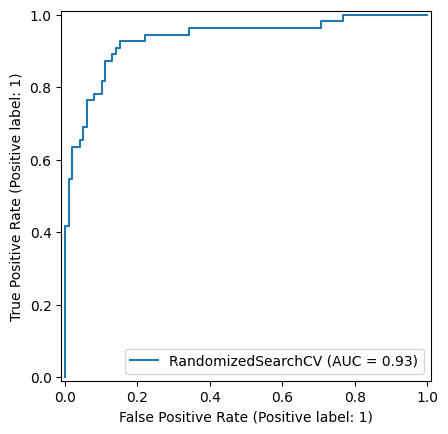

In [30]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test);

### Confusion matrix

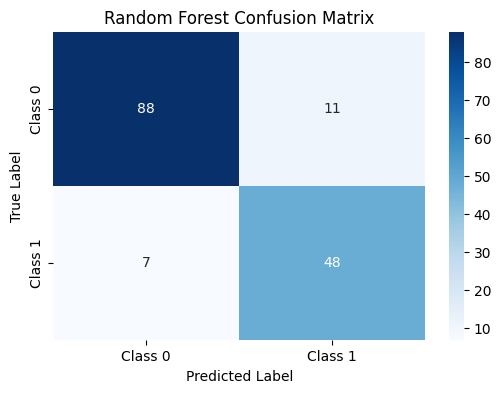

In [31]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

### classification Report

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154



### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

#### Check best hyperparameters

In [33]:
rs_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

#### Create a new classifier with best parameters

In [36]:
clf = RandomForestClassifier(n_estimators = 400,
                             min_samples_split = 6,
                             min_samples_leaf = 3,
                             max_depth= None)

#### Cross-validated accuracy

In [37]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.88961039, 0.83766234, 0.87012987, 0.92156863, 0.88888889])

In [38]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8815720227484933

#### Cross-validated precision

In [39]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8510405085110968

#### Cross-validated recall

In [40]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8174004192872119

#### Cross-validated f1-score

In [41]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8342761525589983

#### Visualize cross-validated metrics

In [43]:
# Sample data (Replace with actual variables)
cv_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1"],
    "Value": [cv_acc * 100, cv_precision * 100, cv_recall * 100, cv_f1 * 100]  # Convert to percentage
})

# Create bar chart using Plotly
fig = px.bar(cv_metrics,
             x="Metric",
             y="Value",
             title="Cross-validated Classification Metrics",
             text=cv_metrics["Value"].apply(lambda x: f"{x:.2f}%"),  # Format as percentage
             labels={"Value": "Score (%)", "Metric": "Evaluation Metric"},
             color="Metric")

# Update layout for better visualization
fig.update_traces(textposition="outside")
fig.update_layout(yaxis=dict(ticksuffix="%"))

# Show the figure
fig.show()


<ipython-input-44-090e704ab3bc>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




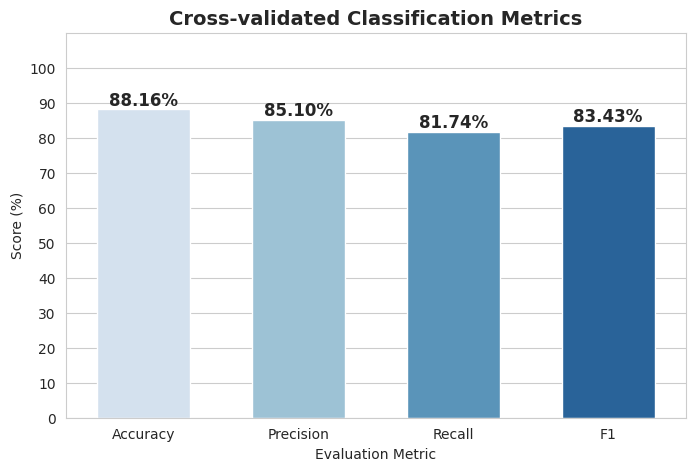

In [44]:
# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Metric", y="Value", data=cv_metrics, palette="Blues", width=0.6)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
plt.title("Cross-validated Classification Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score (%)")
plt.xlabel("Evaluation Metric")
plt.ylim(0, 110)  # Adjust the y-axis to ensure better visibility
plt.yticks(range(0, 110, 10))  # Show y-ticks in percentage scale

# Show the plot
plt.show()